In [2]:
import pandas as pd

# Load the dataset
file_path = 'ds_salaries.csv'
df = pd.read_csv(file_path)

# Display first few rows to understand the data
df.head()

#Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)



threshold = len(df) * 0.5
columns_to_drop = missing_values[missing_values > threshold].index
df.drop(columns=columns_to_drop, inplace=True)


# Impute numeric columns with median
if df['salary_in_usd'].isnull().sum() > 0:
    df['salary_in_usd'].fillna(df['salary_in_usd'].median(), inplace=True)

# For categorical columns, impute using the mode (most frequent value)
if df['experience_level'].isnull().sum() > 0:
    df['experience_level'].fillna(df['experience_level'].mode()[0], inplace=True)

#Check for Duplicate Rows and Remove Them
duplicates = df.duplicated().sum()
print(f"\nNumber of Duplicate Rows: {duplicates}")

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Correct Inconsistent Data Entries
# Convert employment_type to uppercase for consistency
if 'employment_type' in df.columns:
    df['employment_type'] = df['employment_type'].str.upper()

# Ensure Correct Data Types
# Convert work_year to integer if it contains no missing values
if df['work_year'].isnull().sum() == 0:
    df['work_year'] = df['work_year'].astype(int)

#Verify Data After Cleaning
print("\nSummary of Dataset After Cleaning:")
print(df.info())


Missing Values in Each Column:
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Number of Duplicate Rows: 1171

Summary of Dataset After Cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int32 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   i

In [49]:

mean_salary = df['salary_in_usd'].mean()


median_salary = df['salary_in_usd'].median()


mode_salary = df['salary_in_usd'].mode()


mean_salary, median_salary, mode_salary


(133409.28018575851,
 130000.0,
 0    100000
 Name: salary_in_usd, dtype: int64)

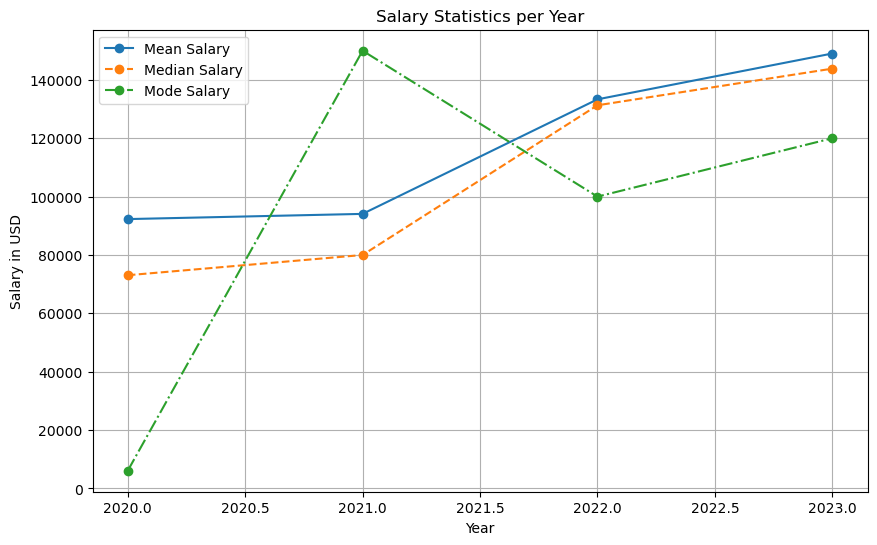

In [33]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'ds_salaries.csv'
df = pd.read_csv(file_path)

# Grouping by 'work_year' and calculating mean and median salary, while handling mode separately
salary_stats_per_year = df.groupby('work_year')['salary_in_usd'].agg(['mean', 'median'])

# Calculating mode for each year separately
mode_salary_per_year = df.groupby('work_year')['salary_in_usd'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)


salary_stats_per_year['mode'] = mode_salary_per_year


years = salary_stats_per_year.index


plt.figure(figsize=(10, 6))
plt.plot(years, salary_stats_per_year['mean'], marker='o', linestyle='-', label='Mean Salary')
plt.plot(years, salary_stats_per_year['median'], marker='o', linestyle='--', label='Median Salary')
plt.plot(years, salary_stats_per_year['mode'], marker='o', linestyle='-.', label='Mode Salary')
plt.xlabel('Year')
plt.ylabel('Salary in USD')
plt.title('Salary Statistics per Year')
plt.legend()
plt.grid(True)
plt.show()


Summary Statistics for Numeric Columns:
         work_year        salary  salary_in_usd  remote_ratio
count  3755.000000  3.755000e+03    3755.000000   3755.000000
mean   2022.373635  1.906956e+05  137570.389880     46.271638
std       0.691448  6.716765e+05   63055.625278     48.589050
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  1.000000e+05   95000.000000      0.000000
50%    2022.000000  1.380000e+05  135000.000000      0.000000
75%    2023.000000  1.800000e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000


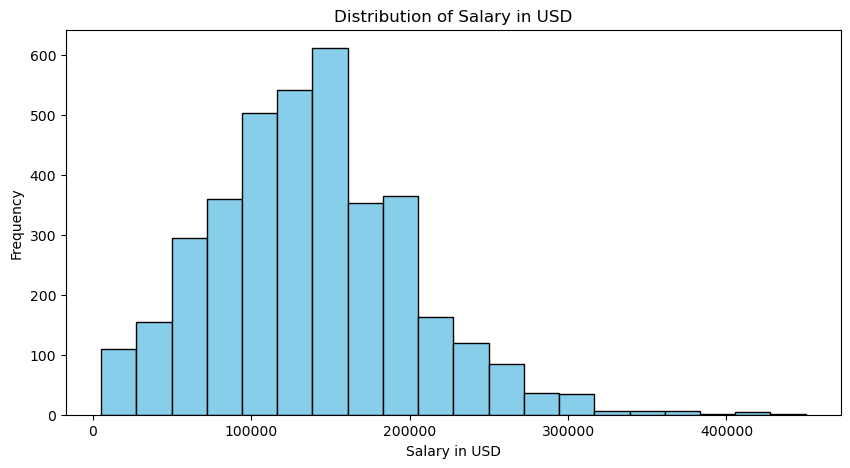

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'ds_salaries.csv'  # Make sure this file is in the correct location
df = pd.read_csv(file_path)

# Numeric Columns
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
summary_statistics = numeric_columns.describe()
print("Summary Statistics for Numeric Columns:")
print(summary_statistics)

# Distribution 

# Histogram for Salary in USD
plt.figure(figsize=(10, 5))
plt.hist(df['salary_in_usd'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Salary in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()






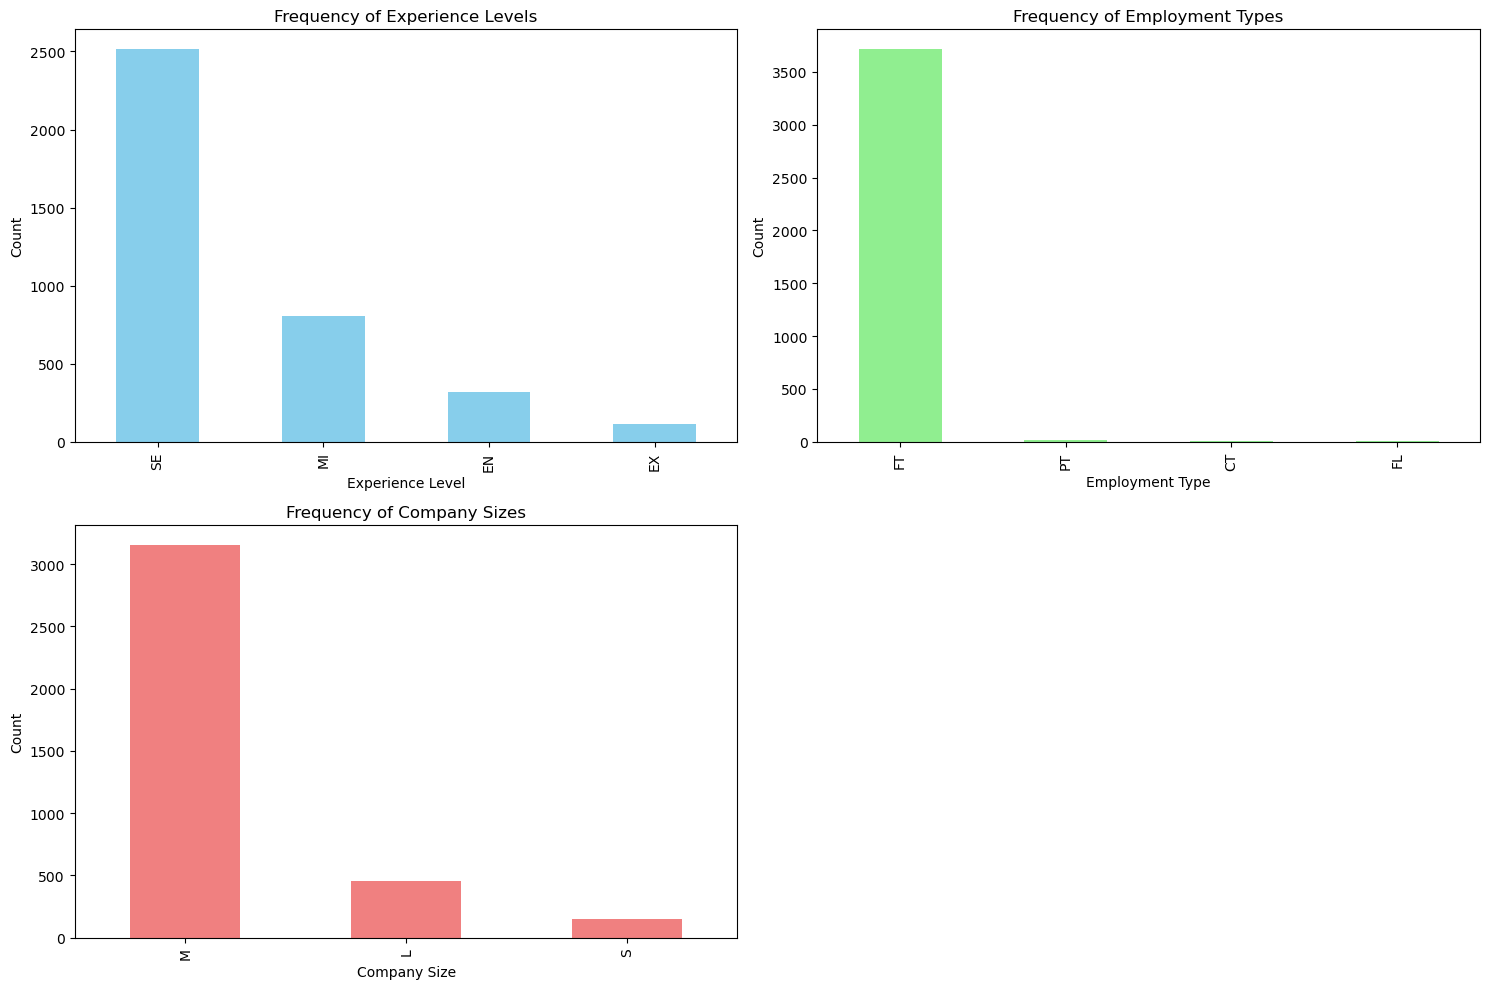

Cross-tabulation of Experience Level and Employment Type:
employment_type   CT  FL    FT  PT
experience_level                  
EN                 2   2   302  14
EX                 1   0   113   0
MI                 5   5   792   3
SE                 2   3  2511   0

Average Salary by Experience Level:
experience_level
EN     78546.284375
EX    194930.929825
MI    104525.939130
SE    153051.071542
Name: salary_in_usd, dtype: float64

Average Salary by Employment Type:
employment_type
CT    113446.900000
FL     51807.800000
FT    138314.199570
PT     39533.705882
Name: salary_in_usd, dtype: float64


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'ds_salaries.csv'  
df = pd.read_csv(file_path)

#  Frequency Distribution of Categorical Columns
experience_counts = df['experience_level'].value_counts()
employment_counts = df['employment_type'].value_counts()
company_size_counts = df['company_size'].value_counts()


plt.figure(figsize=(15, 10))

# Experience Leve
plt.subplot(2, 2, 1)
experience_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Count')

# Employment Type
plt.subplot(2, 2, 2)
employment_counts.plot(kind='bar', color='lightgreen')
plt.title('Frequency of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')

# Company Size
plt.subplot(2, 2, 3)
company_size_counts.plot(kind='bar', color='lightcoral')
plt.title('Frequency of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Cross-tabulation of Experience Level and Employment Type
experience_employment_crosstab = pd.crosstab(df['experience_level'], df['employment_type'])
print("Cross-tabulation of Experience Level and Employment Type:")
print(experience_employment_crosstab)

# Average Salary by Experience Level and Employment Type
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean()
avg_salary_by_employment = df.groupby('employment_type')['salary_in_usd'].mean()

print("\nAverage Salary by Experience Level:")
print(avg_salary_by_experience)

print("\nAverage Salary by Employment Type:")
print(avg_salary_by_employment)


Class Distribution in y_test: Counter({3: 504, 2: 157, 0: 67, 1: 23})
Class Distribution in y_pred: Counter({3: 512, 2: 143, 0: 81, 1: 15})
Accuracy: 64.05%

Classification Report:
              precision    recall  f1-score   support

          EN       0.28      0.34      0.31        67
          EX       0.00      0.00      0.00        23
          MI       0.39      0.36      0.37       157
          SE       0.79      0.80      0.79       504

    accuracy                           0.64       751
   macro avg       0.37      0.37      0.37       751
weighted avg       0.63      0.64      0.64       751



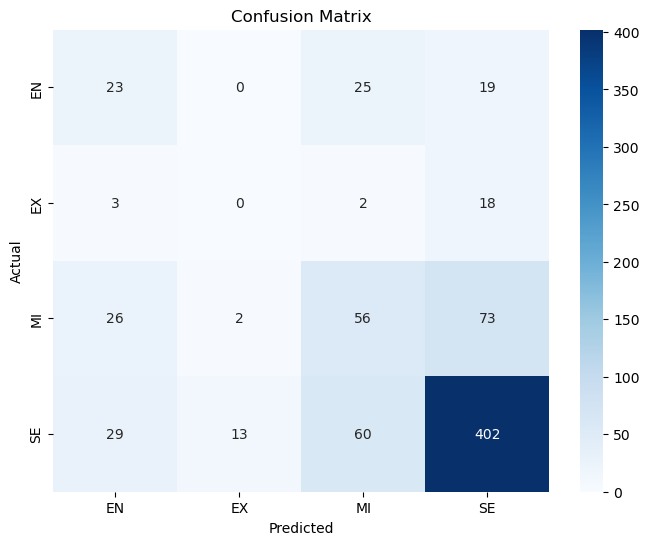

In [21]:
#LAB3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'ds_salaries.csv'
df = pd.read_csv(file_path)

# Features และ Target
X = df[['salary_in_usd', 'remote_ratio']]  # Features
y = df['experience_level']  # Target (Categorical)

# แปลง Target ให้เป็นตัวเลข
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

#มาตรฐานข้อมูล (Scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#แบ่งข้อมูล Train และ Test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

#สร้างและฝึกโมเดล KNN
knn = KNeighborsClassifier(n_neighbors=5)  # k=5
knn.fit(X_train, y_train)

#ทดสอบโมเดล
y_pred = knn.predict(X_test)

#ประเมินผลโมเดล
accuracy = accuracy_score(y_test, y_pred)
print("Class Distribution in y_test:", Counter(y_test))
print("Class Distribution in y_pred:", Counter(y_pred))
print(f"Accuracy: {accuracy * 100:.2f}%")

#รายงานผลการจัดประเภท
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

#Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
#พรีซิชั่น คือ accuracy ของ โพรซิ คลาส
#รีคอล คือ ความสามารถในการดึงข้อมูลของที่แท้จริง
#เอฟวัน คือค่าเฉลี่ ของ พรี กับ รี
#มาโคร คือ 3 ค่าเฉลี่ย

Accuracy: 66.05%
0: Entry-Level 1: Mid-Level 2: Senior-Level  3: Executive-Level
Class Distribution in y_test: Counter({3: 504, 2: 157, 0: 67, 1: 23})
Class Distribution in y_pred: Counter({3: 670, 2: 76, 1: 5})

Classification Report:
              precision    recall  f1-score   support

          EN       0.00      0.00      0.00        67
          EX       0.20      0.04      0.07        23
          MI       0.28      0.13      0.18       157
          SE       0.71      0.94      0.81       504

    accuracy                           0.66       751
   macro avg       0.30      0.28      0.26       751
weighted avg       0.54      0.66      0.58       751



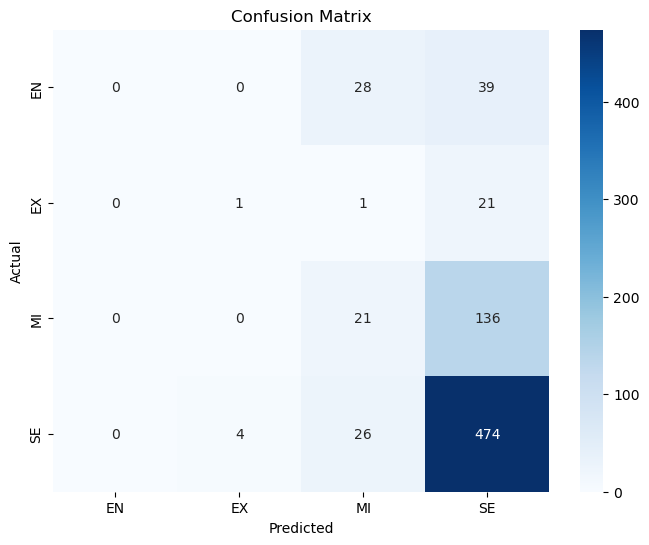

In [19]:
#LAB4 Naïve Bayes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'ds_salaries.csv'  # Update with your local file path
df = pd.read_csv(file_path)

#
# feature'salary_in_usd' and 'remote_ratio' เพื่อคำนวนว่า เงินเดือนเท่านี้ ทำงานเท่านี้ควรอยู่ระดับไหน 'experience_level' 
X = df[['salary_in_usd', 'remote_ratio']]  # Features
y = df['experience_level']  # Target (Categorical)

#Encode the Target Variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Standardize the Feature Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

#Train the Naïve Bayes Classifier
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

#Make Predictions
y_pred = naive_bayes.predict(X_test)

#Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


from collections import Counter
from sklearn.metrics import classification_report

# Check class distribution
print("0: Entry-Level 1: Mid-Level 2: Senior-Level  3: Executive-Level")
print("Class Distribution in y_test:", Counter(y_test))
print("Class Distribution in y_pred:", Counter(y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))


#Confusion Matrix 
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Class Distribution in Dataset: Counter({3: 2516, 2: 805, 0: 320, 1: 114})
0: Entry-Level 1: Mid-Level 2: Senior-Level  3: Executive-Level

Accuracy with Additional Features: 67.78%

Classification Report with Additional Features:
              precision    recall  f1-score   support

          EN       0.52      0.19      0.28        67
          EX       0.00      0.00      0.00        23
          MI       0.35      0.28      0.31       157
          SE       0.75      0.90      0.82       504

    accuracy                           0.68       751
   macro avg       0.41      0.34      0.35       751
weighted avg       0.62      0.68      0.64       751



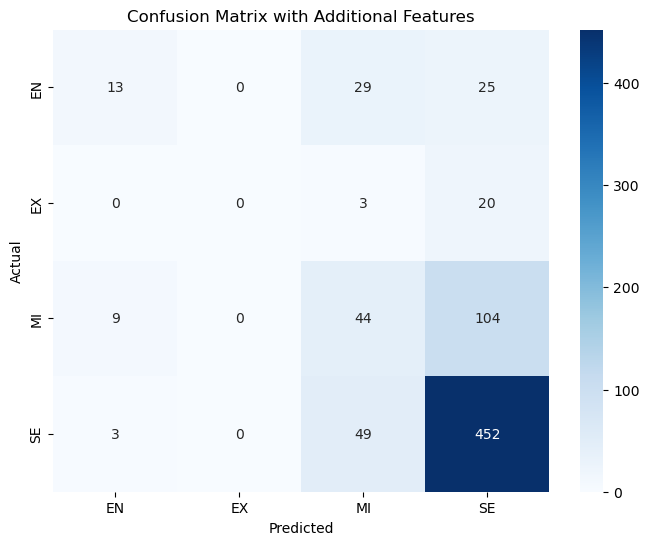

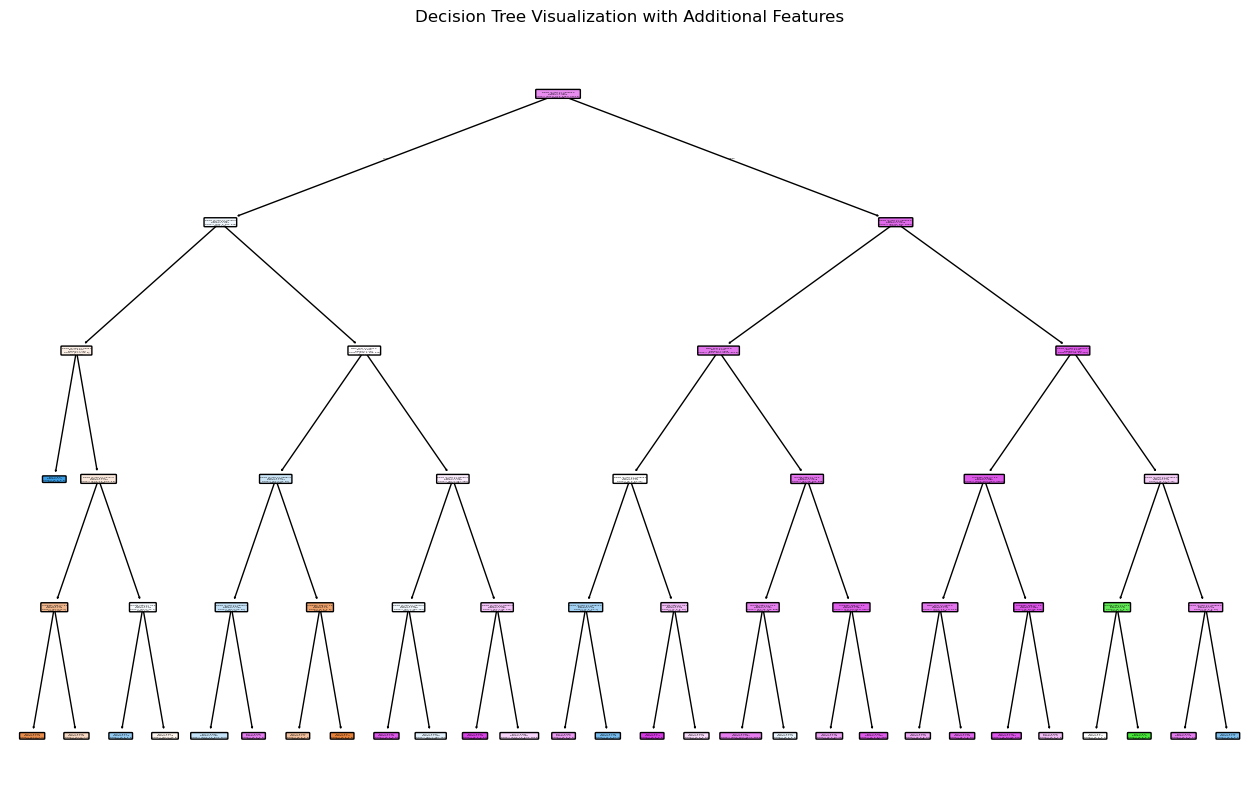

|--- salary_in_usd <= 100250.00
|   |--- salary_in_usd <= 36708.00
|   |   |--- salary_in_usd <= 5693.00
|   |   |   |--- class: 2
|   |   |--- salary_in_usd >  5693.00
|   |   |   |--- salary_in_usd <= 13741.00
|   |   |   |   |--- company_size <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- company_size >  0.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- salary_in_usd >  13741.00
|   |   |   |   |--- remote_ratio <= 25.00
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- remote_ratio >  25.00
|   |   |   |   |   |--- class: 0
|   |--- salary_in_usd >  36708.00
|   |   |--- work_year <= 2021.50
|   |   |   |--- salary_in_usd <= 99851.50
|   |   |   |   |--- salary_in_usd <= 95929.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- salary_in_usd >  95929.50
|   |   |   |   |   |--- class: 3
|   |   |   |--- salary_in_usd >  99851.50
|   |   |   |   |--- company_size <= 1.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- company_size >  1.50
|   

In [1]:
#LAB5
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


file_path = 'ds_salaries.csv'
df = pd.read_csv(file_path)

# categorical data
if 'company_size' in df.columns:
    df['company_size'] = LabelEncoder().fit_transform(df['company_size'])  
if 'work_year' in df.columns:
    df['work_year'] = df['work_year'].astype(int)  

# เลือก feature 
X = df[['salary_in_usd', 'remote_ratio', 'company_size', 'work_year']]
y = df['experience_level']

# Encode
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#class distribution
print("Class Distribution in Dataset:", Counter(y_encoded))

#แยกข้อมูลสำหรับ Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Train ใช้ gini index
dt_classifier = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_classifier.fit(X_train, y_train)

# Predictions
y_pred = dt_classifier.predict(X_test)



accuracy = accuracy_score(y_test, y_pred)
print("0: Entry-Level 1: Mid-Level 2: Senior-Level  3: Executive-Level")
print(f"\nAccuracy with Additional Features: {accuracy * 100:.2f}%")
print("\nClassification Report with Additional Features:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix with Additional Features')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualize the Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(dt_classifier, feature_names=['salary_in_usd', 'remote_ratio', 'company_size', 'work_year'], 
          class_names=label_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization with Additional Features")
plt.show()

# tree rules as text
tree_rules = export_text(dt_classifier, feature_names=['salary_in_usd', 'remote_ratio', 'company_size', 'work_year'])
print(tree_rules)


Intercept: -42373377.34
Coefficient: 21020.63
Mean Squared Error (MSE): 3764814231.13
R-squared (R2): 0.05


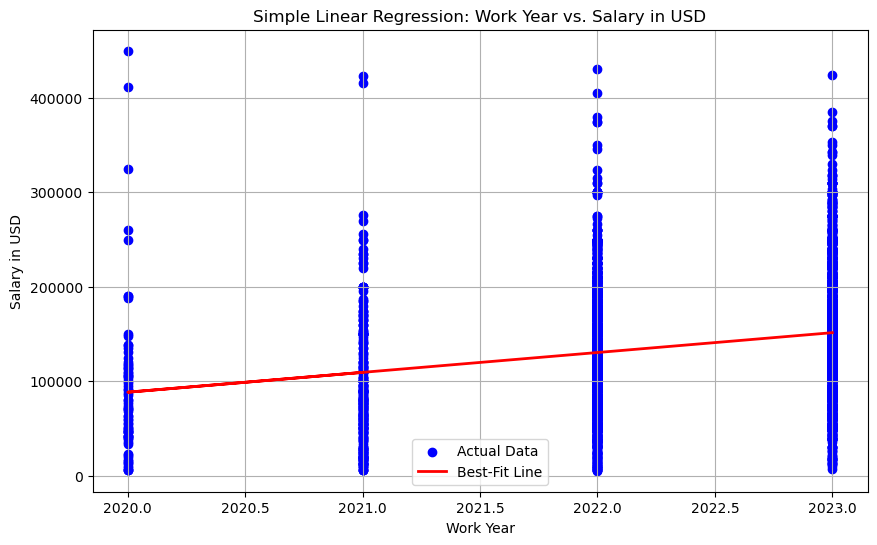

In [2]:
# LAB6
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = 'ds_salaries.csv'
df = pd.read_csv(file_path)

# Select features for simple linear regression
# Using 'work_year' =independent variable (X) |'salary_in_usd' = dependent variable (y)
X = df[['work_year']]
y = df['salary_in_usd']

#  Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Extract intercepts and coefficients
intercept = lin_reg.intercept_
coefficient = lin_reg.coef_[0]

print(f"Intercept: {intercept:.2f}")
print(f"Coefficient: {coefficient:.2f}")

# Step 4: Predict 
y_pred = lin_reg.predict(X_test)

# Step 5: Evaluate 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Step 6: Visualize the best-fit line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, lin_reg.predict(X), color='red', linewidth=2, label='Best-Fit Line')
plt.title('Simple Linear Regression: Work Year vs. Salary in USD')
plt.xlabel('Work Year')
plt.ylabel('Salary in USD')
plt.legend()
plt.grid(True)
plt.show()


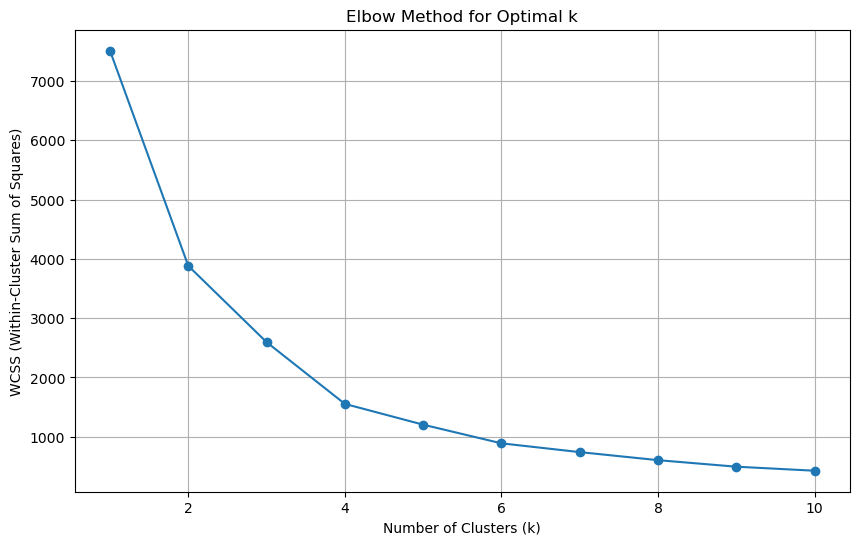

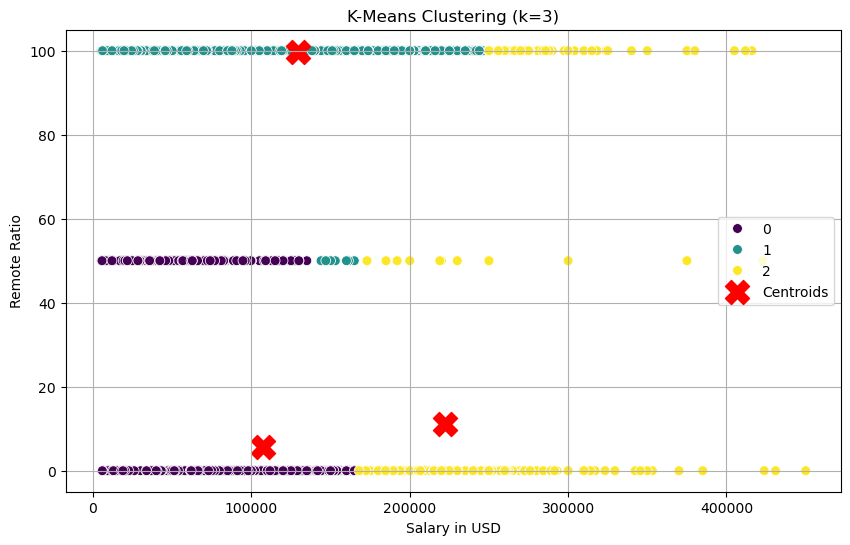

In [6]:
# LAB7
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


file_path = 'ds_salaries.csv'
df = pd.read_csv(file_path)

#Select Features for Clustering

X = df[['salary_in_usd', 'remote_ratio']]

#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimal Number of Clusters using the Elbow Method
wcss = []  # sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

#K-Means Clustering K=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['salary_in_usd'], y=df['remote_ratio'], hue=df['Cluster'], palette='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=300, c='red', marker='X', label='Centroids')
plt.xlabel('Salary in USD')
plt.ylabel('Remote Ratio')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.legend()
plt.grid(True)
plt.show()


In [2]:
#LAB8

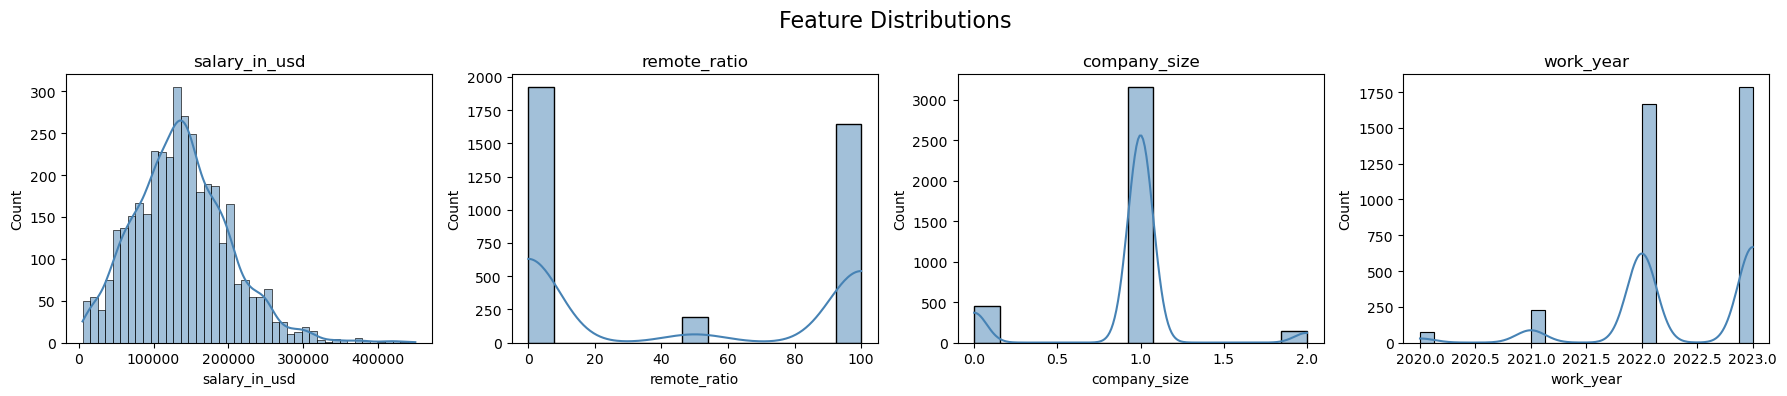

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_14092\1069375640.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, order=y.value_counts().index, palette='Set2')


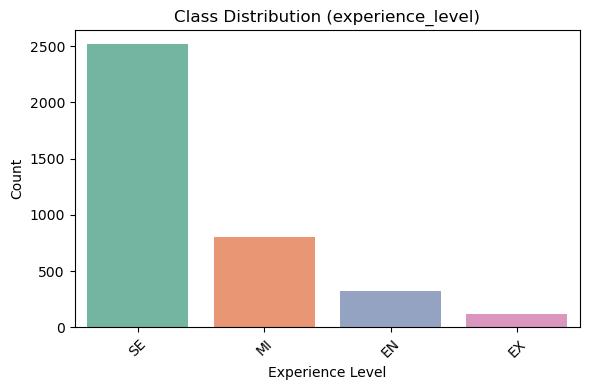

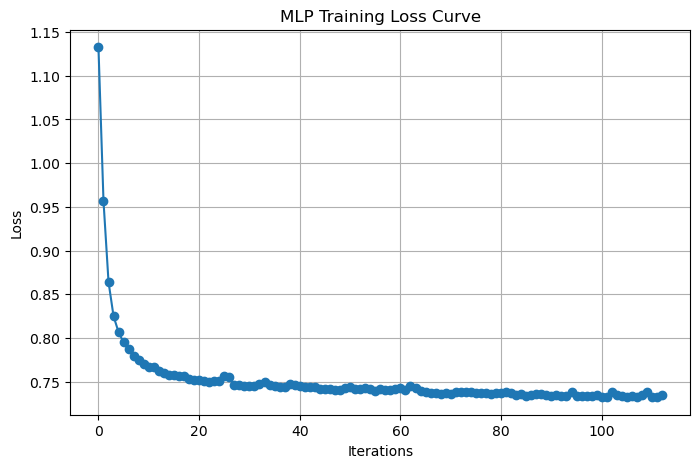


Accuracy: 68.31%

Classification Report:
              precision    recall  f1-score   support

          EN       0.47      0.28      0.36        67
          EX       0.00      0.00      0.00        23
          MI       0.36      0.16      0.22       157
          SE       0.73      0.93      0.82       504

    accuracy                           0.68       751
   macro avg       0.39      0.34      0.35       751
weighted avg       0.61      0.68      0.63       751



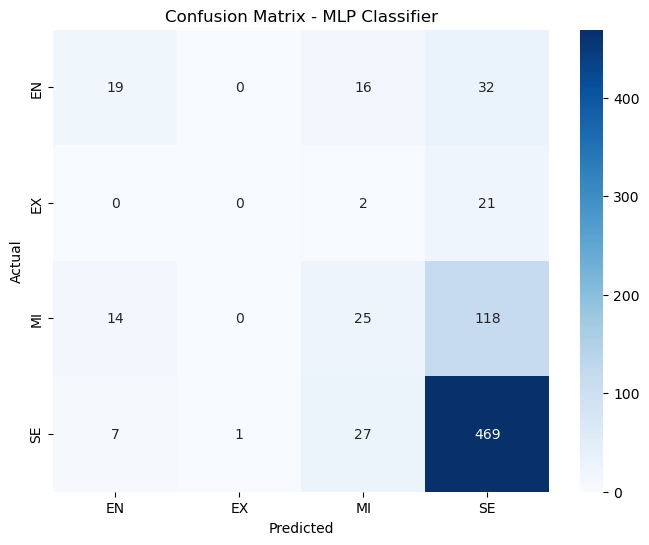

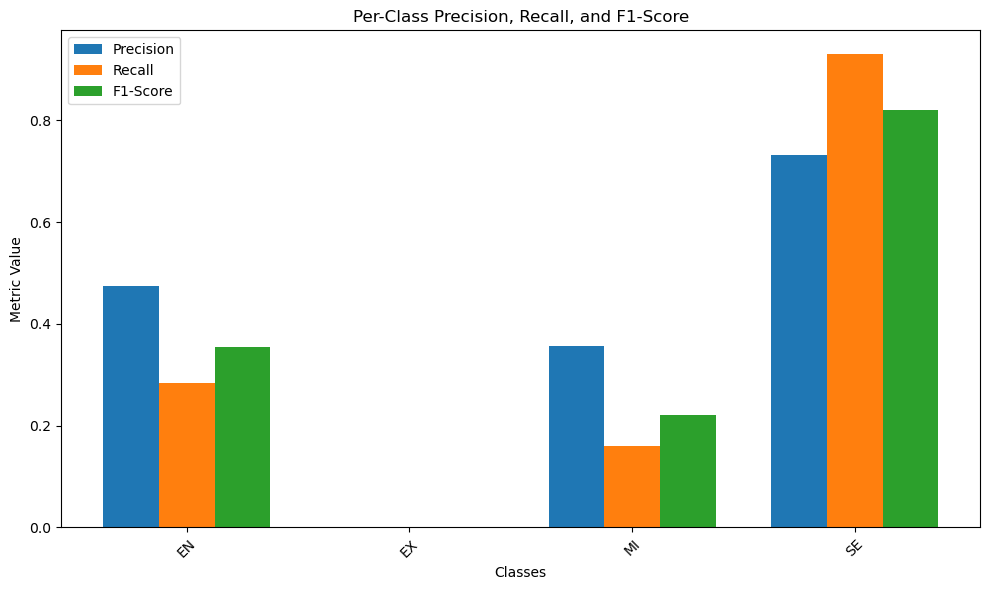

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_fscore_support


file_path = 'ds_salaries.csv'  
df = pd.read_csv(file_path)


# Encode 'company_size' 
if 'company_size' in df.columns:
    company_size_encoder = LabelEncoder()
    df['company_size'] = company_size_encoder.fit_transform(df['company_size'])

# Convert 'work_year' to integer 
if 'work_year' in df.columns:
    df['work_year'] = df['work_year'].astype(int)


X = df[['salary_in_usd', 'remote_ratio', 'company_size', 'work_year']]
y = df['experience_level']

# Encode (experience_level)
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Scale the Feature Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


feature_names = X.columns
fig, axes = plt.subplots(1, len(feature_names), figsize=(18, 4))
fig.suptitle('Feature Distributions', fontsize=16)

for i, col in enumerate(feature_names):
    sns.histplot(data=df, x=col, ax=axes[i], kde=True, color='steelblue')
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=y, order=y.value_counts().index, palette='Set2')
plt.title('Class Distribution (experience_level)')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, 
    y_encoded, 
    test_size=0.2, 
    random_state=42
)




loss_values = mlp.loss_curve_
plt.figure(figsize=(8, 5))
plt.plot(range(len(loss_values)), loss_values, marker='o')
plt.title('MLP Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# Predictions
y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy * 100:.2f}%")

# Classification Report
class_labels = target_encoder.classes_
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=class_labels))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_labels, 
    yticklabels=class_labels
)
plt.title('Confusion Matrix - MLP Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **EXTRA PLOT: Per-Class Precision, Recall, F1** --------------------
prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, zero_division=0)
x_positions = np.arange(len(class_labels))

plt.figure(figsize=(10, 6))
bar_width = 0.25

plt.bar(x_positions - bar_width, prec, bar_width, label='Precision')
plt.bar(x_positions, rec, bar_width, label='Recall')
plt.bar(x_positions + bar_width, f1, bar_width, label='F1-Score')

plt.xticks(x_positions, class_labels, rotation=45)
plt.title('Per-Class Precision, Recall, and F1-Score')
plt.xlabel('Classes')
plt.ylabel('Metric Value')
plt.legend()
plt.tight_layout()
plt.show()
